In [994]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [995]:
# Ignore warnings

import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

## Reading the data file and size inspection

In [996]:
df = pd.read_csv("loan.csv")

E:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [997]:
df.shape

(39717, 111)

In [998]:
pd.set_option('display.max_columns', 200)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [999]:
pd.set_option('display.max_info_columns', 200)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [1000]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Data cleaning

## 1. Removing the columns which have only blank values

In [1001]:
## check percentage of nulls in each columns
nulls =df.isnull().sum()/len(df)*100
nulls

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [1002]:
## names of all columns which have null values in all rows  100% nulls
null_only_cols = nulls[nulls ==100].index
null_only_cols


Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [1003]:
## drop those columns
df = df.drop(null_only_cols, axis = 1)

In [1004]:
## check the new size of dataframe to confirm dropped columns
df.shape

(39717, 57)

In [1005]:
## recheck null data
nulls =df.isnull().sum()/len(df)*100
nulls

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


### 2. Investigating two more columns which have more than  90% of values as null

In [1006]:
## two more colmns have more than 90% of null values, let us have a quick look at the columns 
df['next_pymnt_d'].describe()          

count       1140
unique         2
top       Jun-16
freq        1125
Name: next_pymnt_d, dtype: object

In [1007]:
## as the above result shows most of the loan applications have same data for this field, it is not much informative.
#let us drop it as well
df.drop('next_pymnt_d', axis =1, inplace = True)

In [1008]:
df['mths_since_last_record'].describe()

count    2786.000000
mean       69.698134
std        43.822529
min         0.000000
25%        22.000000
50%        90.000000
75%       104.000000
max       129.000000
Name: mths_since_last_record, dtype: float64

In [1009]:
## A very small records are present and it seems like a bias to fix it with average/median, we'll drop this as well.
df.drop('mths_since_last_record', axis =1, inplace = True)

### 3. remaining  columns with null values

In [1010]:
##check the columns which have null data again
nulls  = df.isnull().sum()/len(df) * 100
nulls = nulls[nulls>0].sort_values(ascending = False)
nulls

mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
dtype: float64

#### still 12 columns have null values. we'll inspect and drop/imputate them one by one

In [1011]:
df[nulls.index].describe(include = 'all')

,mths_since_last_delinq,desc,emp_title,emp_length,pub_rec_bankruptcies,last_pymnt_d,collections_12_mths_ex_med,chargeoff_within_12_mths,revol_util,tax_liens,title,last_credit_pull_d
count,14035.000000,26777,37258,38642,39020.000000,39646,39661.0,39661.0,39667,39678.0,39706,39715
unique,NaN,26527,28820,11,NaN,101,NaN,NaN,1089,NaN,19615,106
top,NaN,,US Army,10+ years,NaN,May-16,NaN,NaN,0%,NaN,Debt Consolidation,May-16
freq,NaN,210,134,8879,NaN,1256,NaN,NaN,977,NaN,2184,10308
mean,35.900962,NaN,NaN,NaN,0.043260,NaN,0.0,0.0,NaN,0.0,NaN,NaN
std,22.020060,NaN,NaN,NaN,0.204324,NaN,0.0,0.0,NaN,0.0,NaN,NaN
min,0.000000,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,NaN,0.0,NaN,NaN
25%,18.000000,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,NaN,0.0,NaN,NaN
50%,34.000000,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,NaN,0.0,NaN,NaN
75%,52.000000,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,NaN,0.0,NaN,NaN


##### 3.1 field 'last_credit_pull_d'

In [1012]:
df[df['last_credit_pull_d'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
26025,575712,740467,5000,5000,5000.0,36 months,11.12%,163.98,B,B3,NaN,5 years,RENT,96000.0,Not Verified,Sep-10,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,for my toy business,900xx,CA,4.04,0,Oct-97,0,NaN,4,0,7172,80.60%,9,f,0.0,0.0,3362.960000,3362.96,2553.55,702.45,0.0,106.96,1.34,Jun-12,163.98,NaN,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39476,186499,186347,1000,1000,875.0,36 months,7.12%,30.94,A,A1,NaN,< 1 year,MORTGAGE,120000.0,Not Verified,Dec-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,No more then 25$ per lender. Please read the r...,other,Research On Global Warming,941xx,CA,0.65,0,Jul-97,1,0.0,7,0,2227,3.80%,37,f,0.0,0.0,1110.813028,971.96,1000.00,110.81,0.0,0.00,0.00,Aug-10,185.80,NaN,0.0,1,INDIVIDUAL,0,0.0,0,NaN,0.0


In [1013]:
#only two records are present with this field as null. let us drop these two rows
df = df[~df['last_credit_pull_d'].isnull()]

##### 3.2 field 'last_pymnt_d'

In [1014]:
df[(df['last_pymnt_d'].isnull()) & (df['loan_status'] != 'Charged Off')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [1015]:
#  only 71 records for which  last_pymnt_d is a blank field, all charged off loans. let us drop these rows too.

df = df[~df['last_pymnt_d'].isnull()]

#### 3.3 field 'desc'

In [1016]:
df[~df.desc.isna()]['desc']

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
6          Borrower added on 12/18/11 > I am planning o...
                               ...                        
39708    I would like to pay off my high-interest credi...
39711    I'd like to shift some credit card debt so it ...
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 26730, dtype: object

In [1017]:
# desc seems to be a free text field which we can't use for analysis. let us drop it
df.drop('desc', axis =1, inplace = True)

#### 3.4 field 'collections_12_mths_ex_med'

In [1018]:
df.collections_12_mths_ex_med.value_counts()

0.0    39588
Name: collections_12_mths_ex_med, dtype: int64

In [1019]:
## all applications has collections_12_mths_ex_med =0.  so distinction/decision on this field. let us drop this field too

df.drop('collections_12_mths_ex_med', axis =1, inplace = True)

#### 3.5 field 'emp_length'

In [1020]:
df[df.emp_length.isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
168,1067644,1302032,2500,2500,2500.00000,36 months,7.51%,77.78,A,A3,NaN,NaN,OWN,12000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,GET FREE OF DEBT,961xx,CA,16.30,0,Aug-94,2,NaN,13,0,4853,42.20%,20,f,0.0,0.0,1838.880000,1838.88,1575.06,253.74,0.00,10.08,0.0000,Dec-13,77.78,May-16,1,INDIVIDUAL,0,0.0,0,0.0,0.0
323,1058717,1290516,18000,18000,18000.00000,60 months,17.58%,452.98,D,D4,NaN,NaN,MORTGAGE,60000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,consolidation,363xx,AL,21.96,0,Mar-03,1,75.0,11,0,5945,83.70%,28,f,0.0,0.0,26378.550010,26378.55,18000.00,8378.55,0.00,0.00,0.0000,Sep-15,6909.59,Sep-15,1,INDIVIDUAL,0,0.0,0,0.0,0.0
394,1064582,1298394,4000,4000,4000.00000,36 months,11.71%,132.31,B,B3,NaN,NaN,RENT,24000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Reline pool and fix steeps,328xx,FL,7.50,1,Feb-05,0,16.0,4,0,1593,54.90%,6,f,0.0,0.0,4186.023030,4186.02,4000.00,186.02,0.00,0.00,0.0000,May-12,3658.15,May-12,1,INDIVIDUAL,0,0.0,0,0.0,0.0
422,1064366,1298164,1000,1000,1000.00000,36 months,14.65%,34.50,C,C3,NaN,NaN,RENT,18408.0,Not Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Myloan,080xx,NJ,6.00,0,Apr-93,2,NaN,3,1,2510,83.70%,8,f,0.0,0.0,91.310000,91.31,22.24,12.18,0.00,56.89,10.2402,Jan-12,34.50,Jun-12,1,INDIVIDUAL,0,0.0,0,1.0,0.0
439,1063912,1296491,8250,8250,8250.00000,36 months,7.51%,256.67,A,A3,NaN,NaN,MORTGAGE,31500.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,do over,218xx,MD,17.87,0,Dec-81,4,NaN,17,0,7521,10.40%,37,f,0.0,0.0,9239.889998,9239.89,8250.00,989.89,0.00,0.00,0.0000,Dec-14,278.92,Dec-14,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32591,480410,610728,10000,10000,9975.00000,36 months,14.22%,342.85,C,C5,NaN,NaN,RENT,45000.0,Not Verified,Jan-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expanding Salon Business,191xx,PA,4.51,0,Sep-00,0,37.0,9,0,9696,66.40%,17,f,0.0,0.0,10457.944160,10431.80,10000.00,457.94,0.00,0.00,0.0000,Jun-10,9431.97,Jul-10,1,INDIVIDUAL,0,0.0,0,0.0,0.0
32608,480216,610335,3700,3700,3700.00000,36 months,14.22%,126.86,C,C5,NaN,NaN,RENT,17496.8,Not Verified,Jan-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Financial Freedom,752xx,TX,3.36,0,Aug-06,0,NaN,2,0,1605,45.90%,5,f,0.0,0.0,4566.723907,4566.72,3700.00,866.72,0.00,0.00,0.0000,Feb-13,132.70,Apr-16,1,INDIVIDUAL,0,0.0,0,0.0,0.0
32621,479954,609955,10000,10000,9731.17513,36 months,14.22%,342.85,C,C5,NaN,NaN,MORTGAGE,36000.0,Not Verified,Jan-10,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,Retired & Happy,021xx,MA,3.83,2,Apr-00,3,19.0,3,0,344,34.40%,19,f,0.0,0.0,7542.370000,7431.53,5591.87,1938.07,0.00,12.43,4.3000,Dec-11,342.85,Apr-16,1,INDIVIDUAL,0,0.0,0,0.0,0.0
32631,479836,609803,6000,6000,6000.00000,36 months,12.73%,201.40,C,C1,Tong Parks,NaN,MORTGAGE,60000.0,Not Verified,Jan-10,Fully Paid,n,https://lendingclub.com/browse/loanDe

In [1021]:
## very small# of records, let us drop these records
df = df[~df['emp_length'].isnull()]

#### 3.6 field 'emp_title'

In [1022]:
print(len(df.emp_title.unique()))
print(df.emp_title.value_counts())

28725
US Army                        133
Bank of America                109
IBM                             66
AT&T                            59
Kaiser Permanente               56
                              ... 
Veterans Administration HCS      1
MEDASSURANT                      1
Nonprofit Solutions Network      1
Gulf Bend MHMR                   1
USCCB                            1
Name: emp_title, Length: 28724, dtype: int64


In [1023]:
#above shows quite a variation. and free text field. whihc we can't use for analysis. let us drop it
df.drop('emp_title', axis =1, inplace = True)

#### 3.7 field 'title'

In [1024]:
print(df.title.value_counts())
print(df.title.unique())
      

Debt Consolidation                         2141
Debt Consolidation Loan                    1687
Personal Loan                               639
Consolidation                               510
debt consolidation                          486
                                           ... 
Refinance of High Interest Credit Cards       1
immun0                                        1
Auto Refi                                     1
Debt Consolidation/ Car Down Payment          1
Building my families future                   1
Name: title, Length: 19120, dtype: int64
['Computer' 'bike' 'real estate business' ... 'Retiring credit card debt'
 'MBA Loan Consolidation' 'JAL Loan']


In [1025]:
## from data dictionary and data in table, it seems to be a free text information from borrower
#which we can't use for analysis. let us drop it
df.drop('title', axis =1, inplace = True)

#### 3.8 field 'tax_liens'

In [1026]:
print(df.tax_liens.value_counts())
print(df.tax_liens.unique())

0.0    38535
Name: tax_liens, dtype: int64
[ 0. nan]


In [1027]:
## all fields are either 0 or null. so no decision to be made on this field. let us drop this as well.
## A very small records are present and it seems like a bias to fix it with average/median, we'll drop this as well.
df.drop('tax_liens', axis =1, inplace = True)

#### 3.9 field 'revol_util'

In [1028]:
print(df.revol_util.isna().sum())
print(df.revol_util.value_counts())
print(df.revol_util.unique())

43
0%        939
63%        61
0.20%      61
40.70%     57
66.70%     57
         ... 
29.77%      1
58.77%      1
11.63%      1
54.22%      1
7.64%       1
Name: revol_util, Length: 1087, dtype: int64
['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']


In [1029]:
## difficult to fix it without assuming stuff. only 46 rows with null values exist. let us drop those rows
df = df[~df.revol_util.isna()]

#### 3.10 field 'chargeoff_within_12_mths' 

In [1030]:
print(df.chargeoff_within_12_mths.value_counts())
print(df.chargeoff_within_12_mths.unique())

0.0    38475
Name: chargeoff_within_12_mths, dtype: int64
[ 0. nan]


In [1031]:
## all rows have value zero. no decision to be made on this field. let us drop this field
df.drop('chargeoff_within_12_mths', axis =1, inplace = True)

#### 3.11 field 'pub_rec_bankruptcies' 

In [1032]:
print(df.pub_rec_bankruptcies.value_counts())
print(df.pub_rec_bankruptcies.unique())
print(df.pub_rec_bankruptcies.isna().sum())

0.0    36272
1.0     1556
2.0        7
Name: pub_rec_bankruptcies, dtype: int64
[ 0.  1.  2. nan]
696


In [1033]:
## 0 is the median and mode for the field. let us fill NAs here with 0.
df.pub_rec_bankruptcies.fillna(0, inplace = True)

#### 3.12 field 'mths_since_last_delinq' 

In [1034]:
print(df.mths_since_last_delinq.value_counts())
print(df.mths_since_last_delinq.unique())
print(df.mths_since_last_delinq.isna().sum())
      

0.0      442
15.0     246
30.0     241
23.0     237
24.0     234
        ... 
85.0       1
95.0       1
89.0       1
106.0      1
97.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64
[ nan  35.  38.  61.   8.  20.  18.  68.  45.  48.  41.  40.  74.  25.
  53.  39.  10.  26.  56.  77.  28.  52.  24.  16.  60.  54.  23.   9.
  11.  13.  65.  19.  80.  22.  59.  79.  44.  64.  57.  14.  63.  49.
  15.  73.  70.  29.  51.   5.  55.   2.  30.  47.  75.  33.  69.   4.
  43.  21.  27.  46.  81.  78.  82.  31.  76.  62.  72.  42.  50.   3.
  12.  67.  36.  34.  58.  17.  71.  66.  32.   6.  37.   7.   1.  83.
  86. 115.  96. 103. 120. 106.  89. 107.  85.  97.  95.   0.]
24876


In [1035]:
#quite a lot of varied data, let us look at few sample records 
df[df.mths_since_last_delinq.isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,852xx,AZ,11.20,0,Nov-04,3,NaN,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.0,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,280xx,NC,23.51,0,Jul-05,1,NaN,7,0,17726,85.60%,11,f,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.0,0.00,0.00,May-16,1313.76,May-16,1,INDIVIDUAL,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39650,84918,84914,5000,5000,2025.0,36 months,7.43%,155.38,A,A2,10+ years,MORTGAGE,65000.0,Not Verified,Sep-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,024xx,MA,0.28,0,Dec-94,1,NaN,12,0,1576,5.70%,21,f,0.0,0.0,5200.462983,2106.19,5000.00,200.46,0.0,0.00,0.00,Apr-08,4268.52,Jun-07,1,INDIVIDUAL,0,0,0.0
39659,121568,121574,4000,4000,1925.0,36 months,9.64%,128.41,B,B4,< 1 year,NONE,100000.0,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,950xx,CA,15.00,0,May-99,1,NaN,6,0,8155,14.90%,8,f,0.0,0.0,4622.489229,2224.58,4000.00,622.49,0.0,0.00,0.00,Sep-10,129.76,Aug-07,1,INDIVIDUAL,0,0,0.0
39660,121535,121373,2800,2800,1625.0,36 months,8.70%,88.65,B,B1,< 1 year,NONE,120000.0,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,024xx,MA,15.00,0,May-99,1,NaN,6,0,8155,14.90%,8,f,0.0,0.0,3191.218575,1852.05,2800.00,391.22,0.0,0.00,0.00,Sep-10,89.80,Aug-07,1,INDIVIDUAL,0,0,0.0
39686,111917,111912,6400,6400,4075.0,36 months,9.64%,205.45,B,B4,1 year,RENT,60000.0,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,moving,535xx,WI,7.72,0,Apr-01,0,NaN,7,0,3362,69.30%,8,f,0.0,0.0,7395.962477,4709.15,6400.00,995.96,0.0,0.00,0.00,Aug-10,206.58,Jul-10,1,INDIVIDUAL,0,0,0.0


In [1036]:
## above table shows that mths_since_last_delinq is null when rest of deliq data columns show that account is not delinquent.
#let check this theory in which case we can safely replace NAs as 0

df[(df.mths_since_last_delinq.isna()) &  ~((df.delinq_2yrs == 0)  & (df.acc_now_delinq == 0 )& (df.delinq_amnt == 0))]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies


In [1037]:
df[(df.mths_since_last_delinq == 0) &  ~((df.delinq_2yrs == 0)  & (df.acc_now_delinq == 0 )& (df.delinq_amnt == 0))]


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies


In [1038]:
## looks like the right assumption. let us set the NAs to 0

df.mths_since_last_delinq.fillna(0, inplace = True)

In [1039]:
## finally check if there are any nulls left in our data- ALL GOOD
df.isna().sum().sum()

0

## ---------------------------------------------ALL NULL VALUES HANDLED-------------------------------------

### Additional data imputations

In [1041]:
print(df.shape)

(38531, 49)


In [1043]:
## looks like there are quite a few columns which have only 1 value. they can't be used in any analysis. let us drop them all together
one_value_columns = []
for column in df.columns:
    if df[column].nunique() == 1:
        one_value_columns.append(column)
   #     #loan_df = loan_df.drop(column, axis=1)
print(one_value_columns)

df.drop(one_value_columns, axis = 1, inplace = True)

[]


In [1044]:
## id//member_id/URL are unique identifiers for each loan applcation and hence irrelevant to this analysis. drop this too.
df.drop(['id', 'member_id','url'], axis =1, inplace = True)

### Data type correction

#### 4.1 Date fields

In [1045]:
date_cols =  list(df.columns[df.columns.str.endswith('_d')])
date_cols.extend(['earliest_cr_line'])

In [1046]:
df[date_cols].sample(5)

,issue_d,last_pymnt_d,last_credit_pull_d,earliest_cr_line
1324,Dec-11,Aug-12,Dec-15,Apr-00
30257,May-10,Dec-10,Dec-10,Dec-98
34376,Nov-09,Jun-10,Nov-10,Jul-02
37290,Mar-09,Jan-12,Dec-11,Jun-95
22412,Dec-10,Dec-15,Dec-15,Nov-05


In [1047]:
###### all dates have only month & year info. change the data type to datetime according  to the format
def date_correction(x):
    return pd.to_datetime(x, format = "%b-%y")

df[date_cols] = df[date_cols].apply(date_correction)
    

In [1048]:
# check the data again - ALL GOOD
df[date_cols].sample(5)


,issue_d,last_pymnt_d,last_credit_pull_d,earliest_cr_line
15379,2011-05-01,2014-08-01,2014-09-01,2007-01-01
29237,2010-06-01,2010-11-01,2016-05-01,1994-03-01
37782,2009-01-01,2011-03-01,2016-05-01,1995-11-01
17224,2011-04-01,2012-10-01,2016-05-01,1997-12-01
28610,2010-06-01,2013-03-01,2016-05-01,2006-06-01


#### 4.2 Numerice fields

In [1049]:
df.emp_length.value_counts()

10+ years    8869
< 1 year     4563
2 years      4377
3 years      4084
4 years      3422
5 years      3268
1 year       3225
6 years      2225
7 years      1769
8 years      1474
9 years      1255
Name: emp_length, dtype: int64

In [1050]:
# removing special chars from emp_length field to change it to integer
def duration_correct(x):
    
    extra_c = '+< years'
    for c in extra_c:
        if(c in x):
            x = x.replace(c, '')
    return x

df.emp_length = pd.to_numeric(df.emp_length.apply(duration_correct), downcast = 'integer')

In [1051]:
## loan term, so leave it as it is.
df['term'] =df['term'].apply(lambda x:pd.to_numeric(x.rstrip(" months"))) 
df['term'].value_counts()

36    28194
60    10337
Name: term, dtype: int64

In [1052]:
# remove % to change interest rate field to numeric
df.int_rate = pd.to_numeric(df.int_rate.apply(lambda x:x.replace('%', '')))

In [1053]:
##column rename to more meaning full
df.int_rate.value_counts()
df.rename(columns= {"int_rate":"interest_rate"} , inplace=True )

In [1054]:
df[~(df['revol_util'].isna()) & (df['revol_bal']!=0)].sample(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,interest_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
27216,1500,1500,1500.00000,36,19.41,55.30,F,F4,6,RENT,33600.0,Not Verified,2010-08-01,Fully Paid,home_improvement,341xx,FL,24.21,0,2007-06-01,1,0.0,2,0,299,99.70%,3,0.0,0.0,1990.588554,1990.59,1500.00,490.59,0.0,0.00,0.0000,2013-08-01,55.35,2013-08-01,0.0
13852,2950,2950,2950.00000,36,16.49,104.43,D,D3,2,RENT,19200.0,Not Verified,2011-06-01,Fully Paid,credit_card,432xx,OH,6.81,0,2008-04-01,1,34.0,6,0,3428,63.80%,6,0.0,0.0,3535.122775,3535.12,2950.00,585.12,0.0,0.00,0.0000,2012-12-01,1763.87,2012-12-01,0.0
18392,8000,8000,7975.00000,60,13.06,182.28,C,C2,6,MORTGAGE,52800.0,Verified,2011-03-01,Charged Off,debt_consolidation,925xx,CA,19.84,1,2003-06-01,0,17.0,5,0,1596,79.80%,15,0.0,0.0,6115.420000,6096.42,3328.39,2139.49,0.0,647.54,6.4754,2013-10-01,58.20,2014-03-01,0.0
10950,18000,18000,18000.00000,36,15.23,626.01,C,C5,10,MORTGAGE,93000.0,Source Verified,2011-07-01,Fully Paid,home_improvement,236xx,VA,15.47,0,1984-09-01,1,65.0,11,0,31800,66%,28,0.0,0.0,22750.676000,22750.68,18000.00,4735.68,15.0,0.00,0.0000,2014-09-01,227.70,2014-09-01,0.0
30580,23500,23500,23047.85262,36,11.36,773.42,B,B5,5,RENT,78200.0,Not Verified,2010-04-01,Fully Paid,wedding,208xx,MD,16.10,0,2001-10-01,0,0.0,9,0,11837,52.40%,27,0.0,0.0,27822.441010,27235.16,23500.00,4322.44,0.0,0.00,0.0000,2013-03-01,2318.27,2013-03-01,0.0
16245,6000,6000,6000.00000,36,6.92,185.05,A,A3,10,MORTGAGE,122000.0,Not Verified,2011-04-01,Fully Paid,major_purchase,728xx,AR,11.11,0,1978-07-01,1,0.0,11,0,25048,48.40%,29,0.0,0.0,6661.530919,6661.53,6000.00,661.53,0.0,0.00,0.0000,2014-05-01,188.91,2014-05-01,0.0
24362,15000,15000,14430.27412,60,6.91,296.39,A,A5,9,OWN,90000.0,Source Verified,2010-10-01,Fully Paid,home_improvement,245xx,VA,12.87,1,1980-08-01,0,6.0,11,0,4997,13%,38,0.0,0.0,17782.789940,16999.50,15000.00,2782.79,0.0,0.00,0.0000,2015-11-01,295.77,2015-11-01,0.0
30229,7000,7000,7000.00000,36,14.22,239.99,C,C5,3,RENT,56004.0,Source Verified,2010-05-01,Fully Paid,debt_consolidation,337xx,FL,16.99,0,2000-07-01,0,35.0,11,0,17905,50.40%,20,0.0,0.0,8090.972520,8090.97,7000.00,1090.97,0.0,0.00,0.0000,2011-09-01,4502.49,2016-05-01,0.0
22699,10000,10000,9975.00000,36,6.17,305.00,A,A3,10,MORTGAGE,100000.0,Not Verified,2010-12-01,Fully Paid,home_improvement,296xx,SC,0.18,0,1995-01-01,0,0.0,5,0,588,3.10%,19,0.0,0.0,10957.527910,10930.13,10000.00,957.53,0.0,0.00,0.0000,2013-07-01,1821.99,2016-04-01,0.0
18870,6000,6000,6000.00000,60,9.63,126.40,B,B1,10,MORTGAGE,94000.0,Source Verified,2011-03-01,Fully Paid,car,945xx,CA,3.82,0,1986-06-01,0,39.0,19,0,6912,6.40%,49,0.0,0.0,7374.426256,7374.43,6000.00,1374.43,0.0,0.00,0.0000,2014-08-01,2208.90,2014-08-01,0.0


In [1055]:
# remove % to change revol_util field to numeric
df.revol_util = pd.to_numeric(df.revol_util.apply(lambda x:x.replace('%', '')))

#### 4.3 Derived variables

In [1056]:
df["issue_year"] = df.issue_d.dt.year

#### 4.4 categorical variables

In [1057]:
df.loan_status.value_counts()

Fully Paid     32112
Charged Off     5321
Current         1098
Name: loan_status, dtype: int64

In [1058]:
df['out_prncp'].value_counts()

0.00       37433
2277.11        2
2963.24        2
1972.60        2
160.84         1
           ...  
1726.07        1
1169.55        1
2641.55        1
5355.36        1
3041.22        1
Name: out_prncp, Length: 1096, dtype: int64

In [1059]:
## drop the current loans as these loans are still in progress and hence we won't have enough info to study the past trend
##create the new variable

df1 = df[ df.loan_status != 'Current'].copy()
df1.shape

(37433, 41)

In [1060]:
df1.grade.value_counts()  ## categorical data

B    11345
A     9653
C     7635
D     4950
E     2602
F      954
G      294
Name: grade, dtype: int64

In [1061]:
df1.home_ownership.value_counts() ## categorical data

RENT        18000
MORTGAGE    16572
OWN          2762
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

In [1062]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37433 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                37433 non-null  int64         
 1   funded_amnt              37433 non-null  int64         
 2   funded_amnt_inv          37433 non-null  float64       
 3   term                     37433 non-null  int64         
 4   interest_rate            37433 non-null  float64       
 5   installment              37433 non-null  float64       
 6   grade                    37433 non-null  object        
 7   sub_grade                37433 non-null  object        
 8   emp_length               37433 non-null  int8          
 9   home_ownership           37433 non-null  object        
 10  annual_inc               37433 non-null  float64       
 11  verification_status      37433 non-null  object        
 12  issue_d                  37433 n

In [1063]:
df1.purpose.value_counts()

debt_consolidation    17637
credit_card            4895
other                  3692
home_improvement       2779
major_purchase         2069
small_business         1701
car                    1446
wedding                 906
medical                 654
moving                  550
house                   352
vacation                347
educational             312
renewable_energy         93
Name: purpose, dtype: int64

In [1064]:
df1.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL',
       'PA', 'MN', 'NY', 'NJ', 'OR', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'NV', 'AK', 'CO', 'MD', 'WV', 'VT', 'MI', 'DC',
       'SD', 'NH', 'AR', 'NM', 'KS', 'HI', 'OK', 'MT', 'WY', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [1065]:
df1['total_acc'].value_counts()

16    1390
15    1377
17    1363
14    1361
20    1361
      ... 
76       1
81       1
80       1
77       1
71       1
Name: total_acc, Length: 82, dtype: int64

In [1066]:
df1['verification_status'].value_counts()

Not Verified       16216
Verified           11747
Source Verified     9470
Name: verification_status, dtype: int64

In [1067]:
df1['zip_code'].value_counts()

100xx    575
945xx    517
112xx    492
606xx    486
070xx    447
        ... 
465xx      1
384xx      1
375xx      1
093xx      1
469xx      1
Name: zip_code, Length: 821, dtype: int64

In [1068]:
# remove the field. let us limit the analysis to state level
df1.drop('zip_code', axis =1, inplace = True)

In [1070]:
df1['out_prncp'].value_counts() 

0.0    37433
Name: out_prncp, dtype: int64

In [1231]:
# remove the field. let us limit the analysis to state level
df1.drop(['out_prncp', 'out_prncp_inv'], axis =1, inplace = True)

In [1232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38531 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                38531 non-null  int64         
 1   funded_amnt              38531 non-null  int64         
 2   funded_amnt_inv          38531 non-null  float64       
 3   term                     38531 non-null  int64         
 4   interest_rate            38531 non-null  float64       
 5   installment              38531 non-null  float64       
 6   grade                    38531 non-null  object        
 7   sub_grade                38531 non-null  object        
 8   emp_length               38531 non-null  int8          
 9   home_ownership           38531 non-null  object        
 10  annual_inc               38531 non-null  float64       
 11  verification_status      38531 non-null  object        
 12  issue_d                  38531 n

## ---------------------------------------------Data cleanup complete------------------------------------------------ 
### In the process, we have gotten rid of 5.75% of records and further reduced the 111 fields to 40 for our further analysis

## SEGMENTED UNIVARIATE DATA ANALYSIS

### As part of this analysis, we'll first analyse the data for each field using histogram and distribution plot. Most of analysis is done on segmented data around loan_status so that we can see the trends across both segments

### 1. Ordered categorical data (Issue Year)

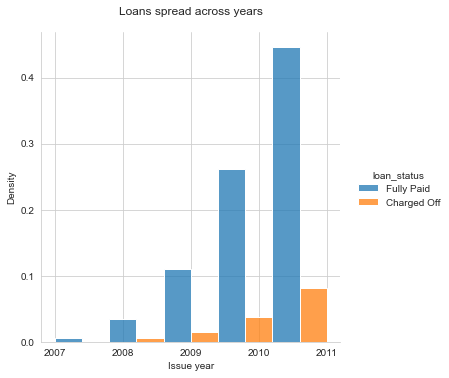

In [1073]:
plt.rcParams['figure.figsize'] = [16,10]
sns.set_style("whitegrid")
sns.displot(data =df1,  x = df1.issue_year,  stat="probability", multiple="dodge", hue = df1.loan_status, bins= 5)
plt.title("Loans spread across years\n")
plt.xlabel("Issue year")
plt.xticks(df1.issue_year.unique())
plt.ylabel("Density")
plt.show()

# INSIGHT:  The number of the loans(both paid and defaulted segments) increase steadily over the years 
#doesn't show any varied pattern in both segments over the years 

In [1074]:

def calculate_default_rate (data, col_name):
    charged_off =data[data["loan_status"] == "Charged Off"].groupby([col_name,'loan_status'])[ 'loan_status'].count().unstack().fillna(0).reset_index()
    paid_off =data[data["loan_status"] == "Fully Paid"].groupby([col_name,'loan_status'])[ 'loan_status'].count().unstack().fillna(0).reset_index()
    charged_off["Charged_Off_%"] = charged_off["Charged Off"]/ (charged_off["Charged Off"] + paid_off["Fully Paid"])*100
    return charged_off

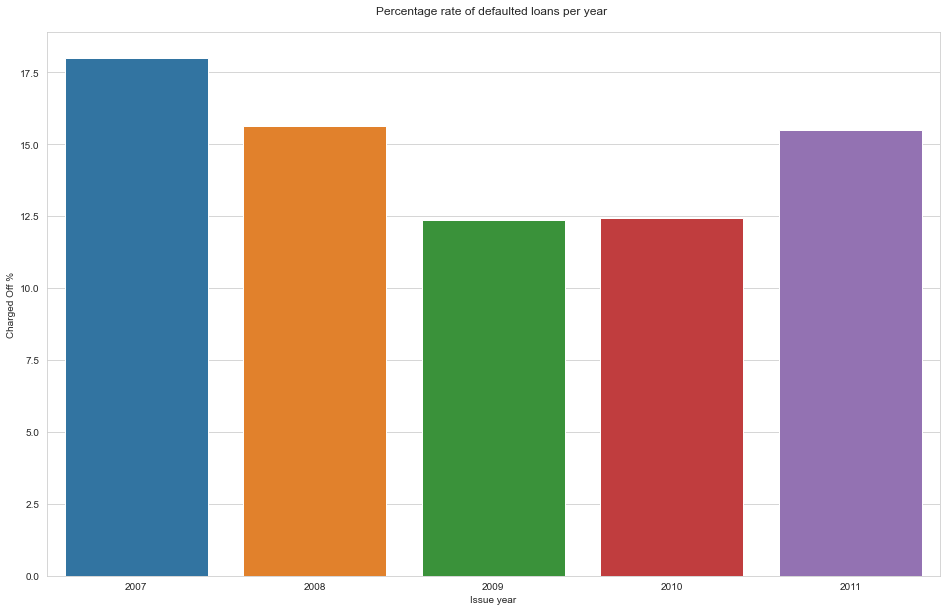

In [1075]:
## let us also calculate the percentage % of charged off loans per year

charged_off_year = calculate_default_rate(df1, 'issue_year')
sns.barplot(data =charged_off_year, x =charged_off_year.issue_year, y = charged_off_year['Charged_Off_%'])
plt.title("Percentage rate of defaulted loans per year \n")
plt.xlabel("Issue year")
plt.ylabel("Charged Off %")
plt.show()


# INSIGHT: more loans issued in 2007 and 2011 have defaulted. May be market conditions? or change in loan crietria. need more investigation

### 2. Un-ordered categorical data (Housing Type)

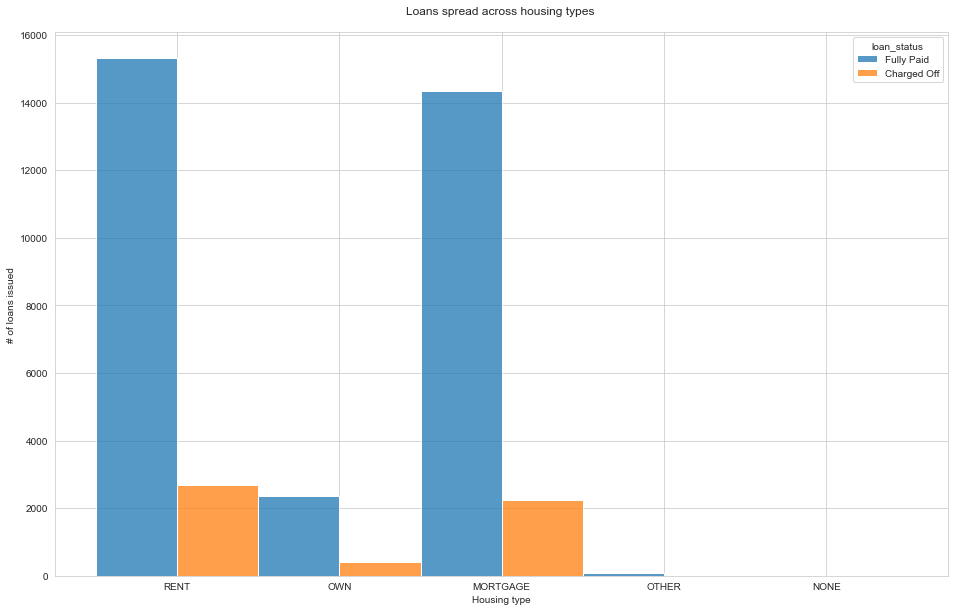

In [1076]:
sns.histplot(data = df1, x = df1.home_ownership, multiple="dodge", hue = df1.loan_status )
plt.title("Loans spread across housing types \n")
plt.xlabel("Housing type")
plt.ylabel("# of loans issued")
plt.show()

## INSIGHT: more number of loans(both paid and defaulted segments) are issued to consumers who are renting their houses or mortaging
#doesn't show any varied pattern in both segments across housing types

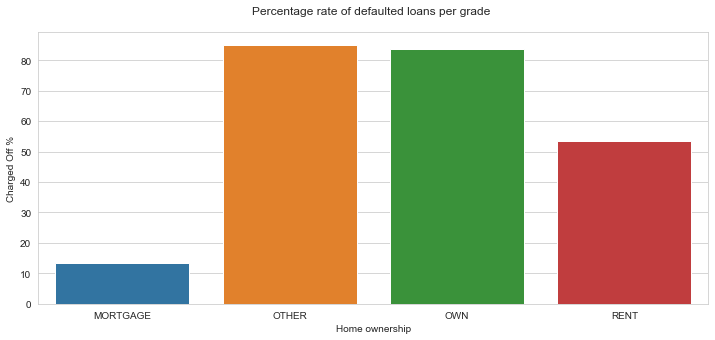

In [1122]:
# calculate % rate of default for all housing categories
charged_off_housing = calculate_default_rate(df1, 'home_ownership')
sns.barplot(data =charged_off_housing, x =charged_off_housing.home_ownership, y = charged_off_housing['Charged_Off_%'])
plt.title("Percentage rate of defaulted loans per grade \n")
plt.xlabel("Home ownership")
plt.ylabel("Charged Off %")
plt.show()

#INSIGHT: loans issued to OTHER and OWNERS are defaulting. Need to make more stringent criteria for these two categories

### 3. Ordered categorical data (Employment length)

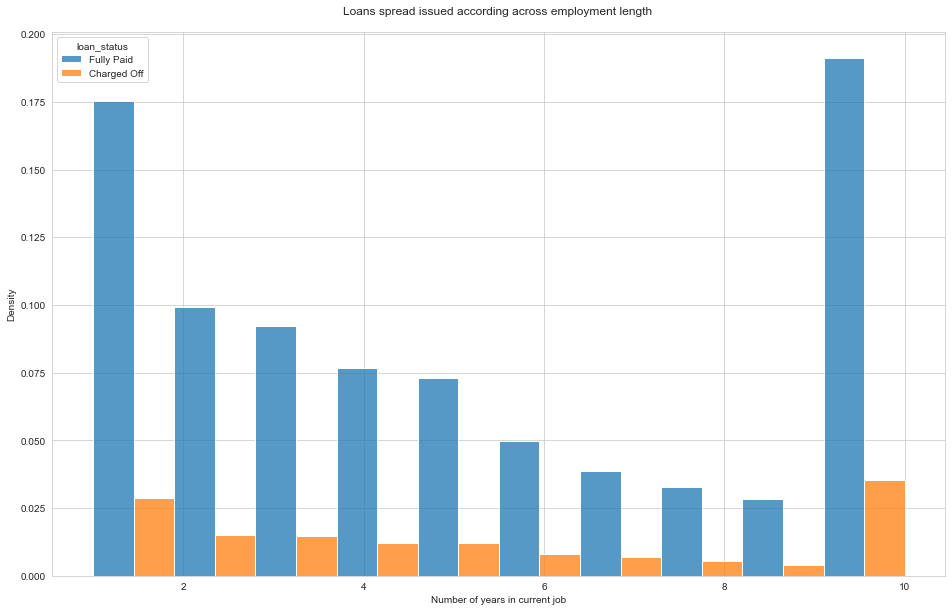

In [1078]:
ax= sns.histplot(data = df1, x= df1.emp_length, hue = df1.loan_status,  stat="probability", multiple="dodge" , bins =10)
plt.title("Loans spread issued according across employment length \n")
plt.xlabel("Number of years in current job")
plt.ylabel("Density")
plt.show()

## INSIGHT:  Most number of the loans(both paid and defaulted segments) are issued to customers who are in a steady job(>10 years) and between 1&2 yrs. 
##doesn't show any varied pattern in both segments across various employment lengths

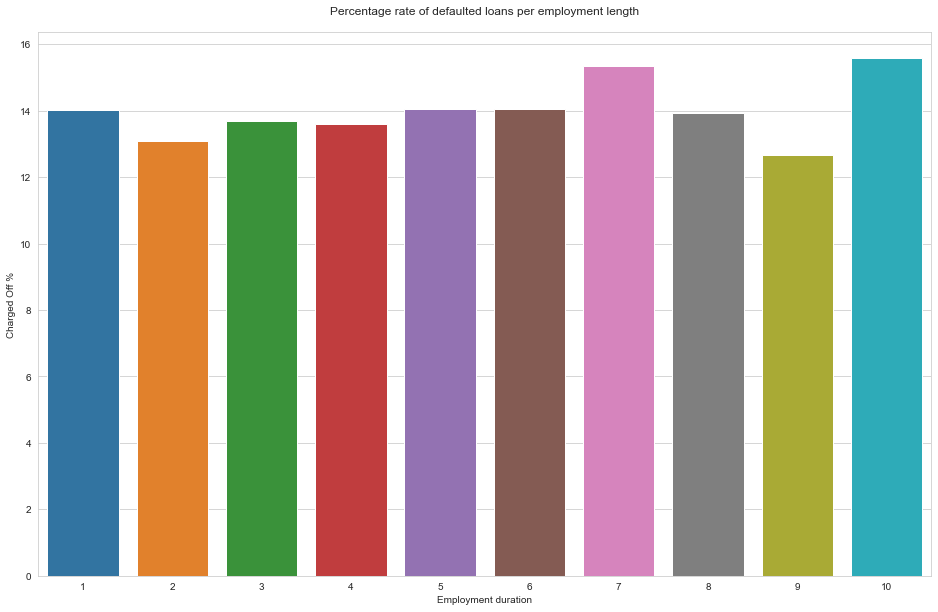

In [1079]:
# % default rate for all employment length
charged_off_el = calculate_default_rate(df1[df1['emp_length'] !=0], 'emp_length')
sns.barplot(data =charged_off_el, x =charged_off_el.emp_length, y = charged_off_el['Charged_Off_%'])
plt.title("Percentage rate of defaulted loans per employment length\n")
plt.xlabel("Employment duration")
plt.ylabel("Charged Off %")
plt.show()


#INSIGHT: Only slightly variation in default rate across various employment lengths. 

### 4. Ordered categorical data (Loan grade)

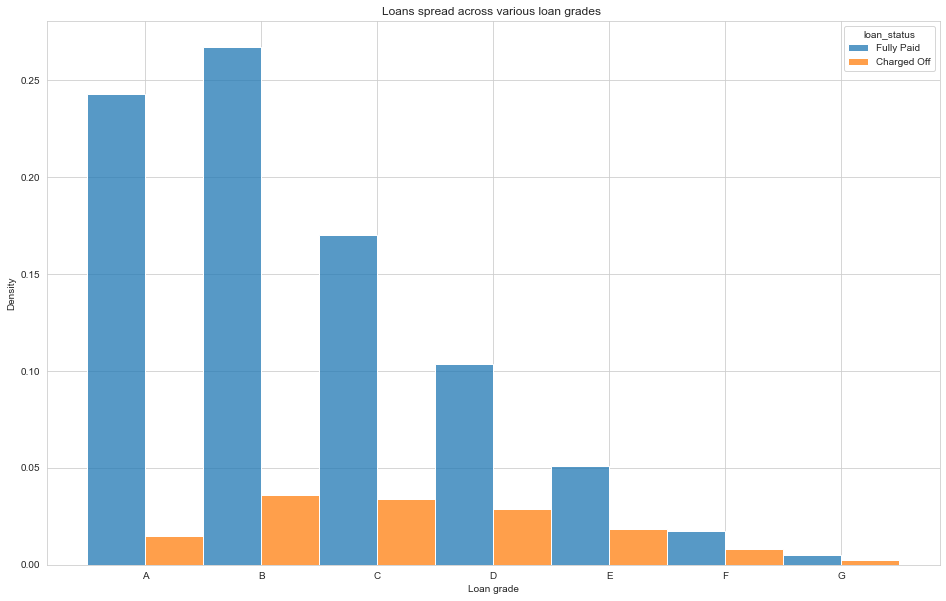

In [1080]:
xLabels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df2 = df1.copy()
df2['grade'] = pd.Categorical(df1['grade'], categories=xLabels) 
sns.histplot(data =df2,  x = df2.grade,  stat="probability", multiple="dodge", hue = df2.loan_status)
plt.title("Loans spread across various loan grades ")
plt.xlabel("Loan grade")
plt.ylabel("Density")
plt.show()

## INSIGHT: shows most number of loans(both paid and defaulted segments) fall in good grades A &B. number of loans issued reduce rapidly as grade goes down  
##doesn't show any varied pattern in both segments over the years 


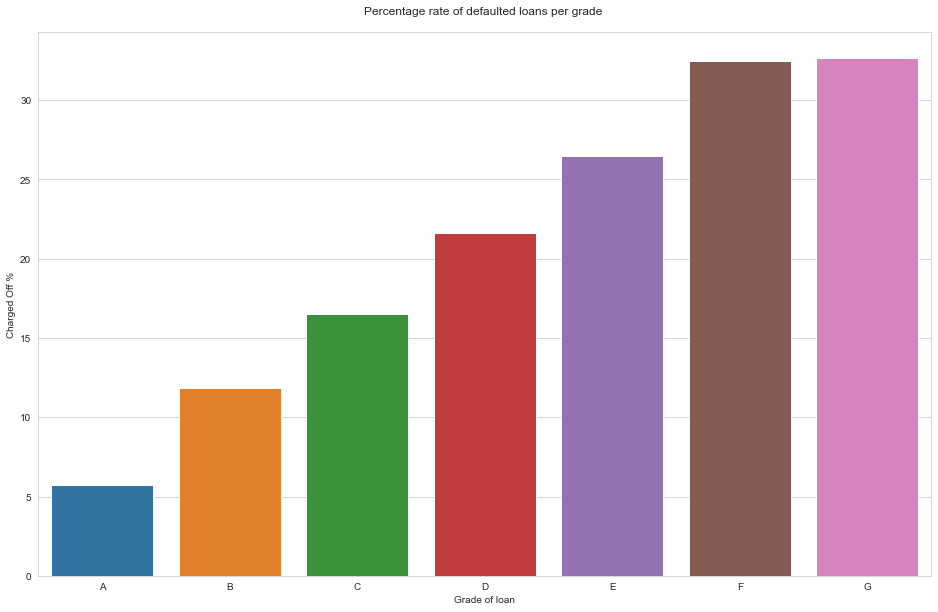

In [1081]:
# calculate % rate of default for all loan grades
charged_off_loans_grade = calculate_default_rate(df1, 'grade')
sns.barplot(data =charged_off_loans_grade, x =charged_off_loans_grade.grade, y = charged_off_loans_grade['Charged_Off_%'])
plt.title("Percentage rate of defaulted loans per grade \n")
plt.xlabel("Grade of loan")
plt.ylabel("Charged Off %")

plt.show()

#INSIGHT: As the loans degrades, more and more loans are charged off. This shows that the credit crietria to define loan grade is consistenly right.

### 5. Ordered categorical data (Loan term)

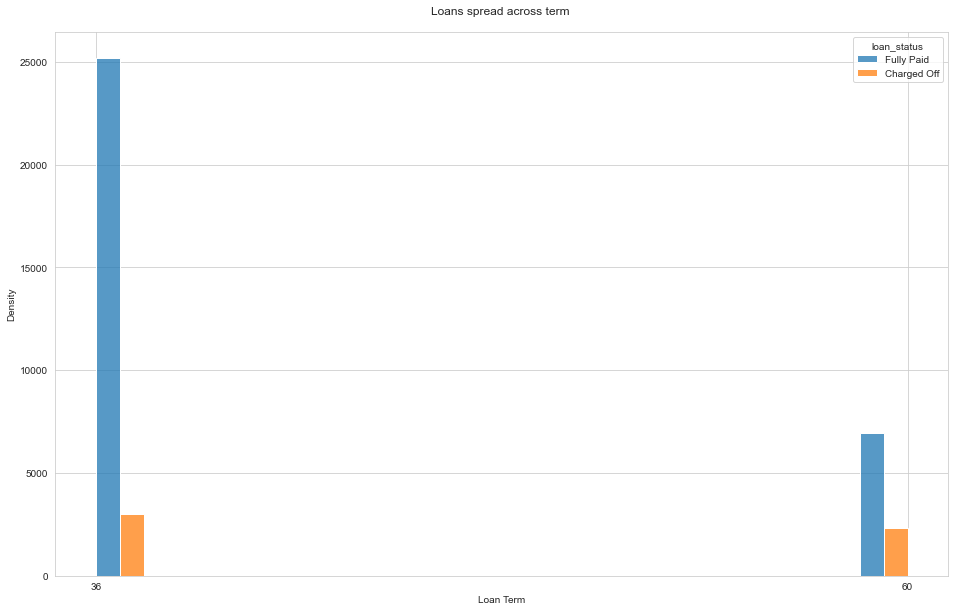

In [1082]:
sns.histplot( data = df1, x = df1.term, multiple="dodge", hue = df2.loan_status )
plt.title("Loans spread across term \n")
plt.xlabel("Loan Term")
plt.ylabel("Density")
plt.xticks(df1.term.unique())
plt.show()

## INSIGHT: more number of loans(both paid and defaulted segments) are issued for 3 years than 5 years
#doesn't show any varied pattern in both segments over the years 


### 7. Unordered categorical variable(Purpose)

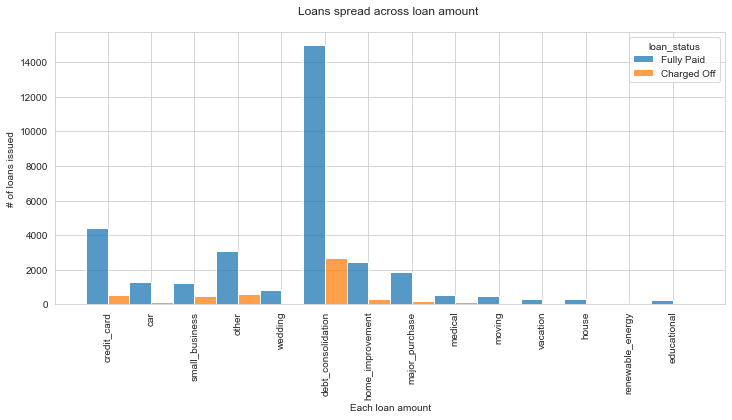

In [1083]:
plt.rcParams["figure.figsize"] = (12, 5)
sns.histplot(data = df1, x = df1.purpose,multiple = 'dodge', hue = df1.loan_status )
plt.title("Loans spread across loan amount \n")
plt.xlabel("Each loan amount")
plt.ylabel("# of loans issued")
plt.xticks(rotation = 90)
plt.show()

# INSIGHT: most of the loans (both paid and defaulted segments) are issued for debt consolidation followed by credit cards & other
#doesn't show any varied pattern in both segments for any purpose

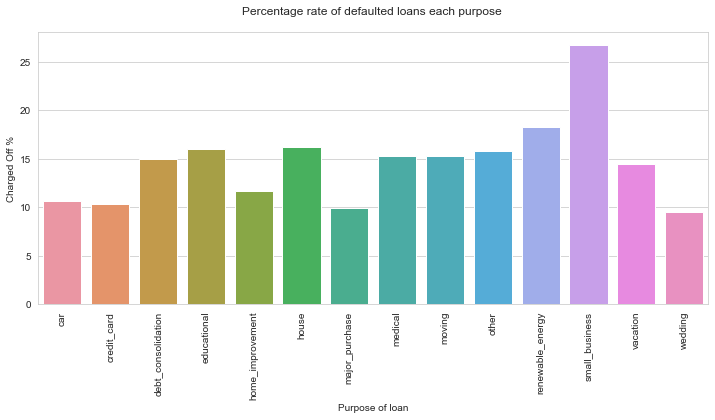

In [1084]:
# calculate default rate for each customer purpose.
charged_off_purpose = calculate_default_rate(df1, 'purpose')
sns.barplot(data =charged_off_purpose, x =charged_off_purpose.purpose, y = charged_off_purpose['Charged_Off_%'])
plt.title("Percentage rate of defaulted loans each purpose \n")
plt.xlabel("Purpose of loan")
plt.ylabel("Charged Off %")
plt.xticks(rotation = 90)

plt.show()

#INSIGHT: loans issued to "Small Businesses" tend to default more than others.

### 8. Numerical data (Loan amount)

In [1085]:
def plot_box(d, col_name, title, xlabel):
    sns.boxplot(data = d, x= d[col_name] )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()
    

count    38531.000000
mean     11303.772936
std       7460.520685
min        500.000000
25%       5525.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


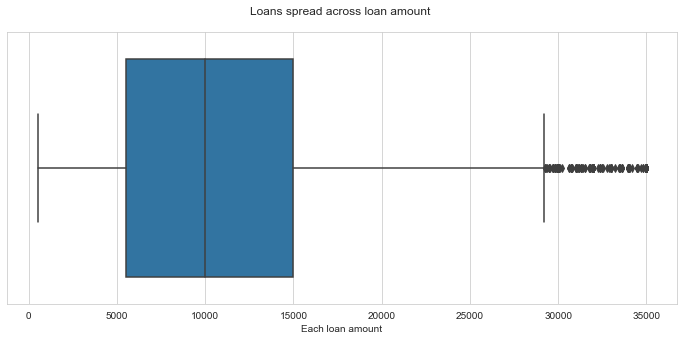

In [1086]:
print(df.loan_amnt.describe())
plot_box(df1, 'loan_amnt', "Loans spread across loan amount \n","Each loan amount")
plt.show()

# INSIGHT: most of the loans are of near to amount 10K reaching upto 35K. There are some outliers which we'll remove

In [1087]:
# function to remove outliers based on IQR
def remove_outliers_iqr(data, col):
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        print(Q3, Q1, IQR)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print(lower_bound, upper_bound)
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
        return data

In [1088]:
#remove outliers on basis Loan amount and plot the graph again
df1 = remove_outliers_iqr(df1, 'loan_amnt')

15000.0 5500.0 9500.0
-8750.0 29250.0


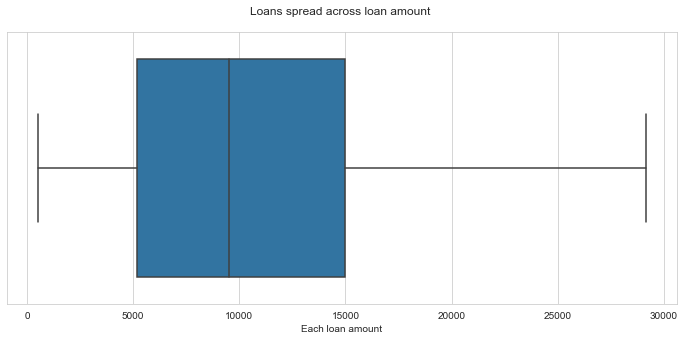

In [1089]:
plot_box(df1, 'loan_amnt', "Loans spread across loan amount \n","Each loan amount")

### 9. Numerical data (Annual Income)

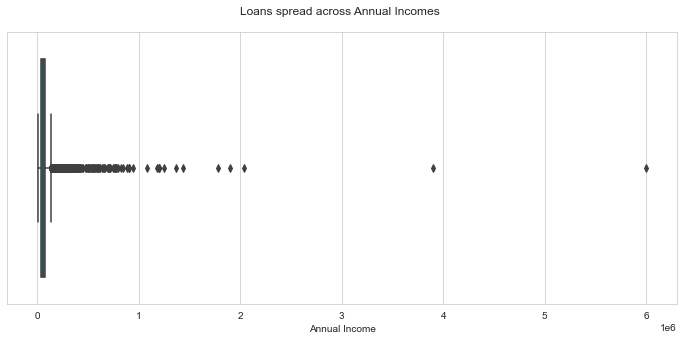

In [1090]:
plot_box( df1, 'annual_inc', "Loans spread across Annual Incomes \n", "Annual Income")
plt.show()

# quite a number of outliers


80004.0 40046.0 39958.0
-19891.0 139941.0


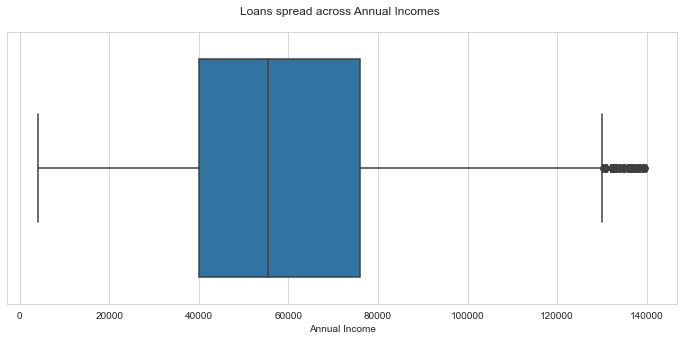

In [1091]:
#remove outliers on basis AnnualIncome and plot the graph again
df1 = remove_outliers_iqr(df1, 'annual_inc')
plot_box( df1, 'annual_inc', "Loans spread across Annual Incomes \n", "Annual Income")
plt.show()

# INSIGHT: Most of the consumers have their salary in 50 to 60K range.


In [1092]:
df1.shape

(34567, 40)

### 10. Unordered categorical variable (Customer address state)

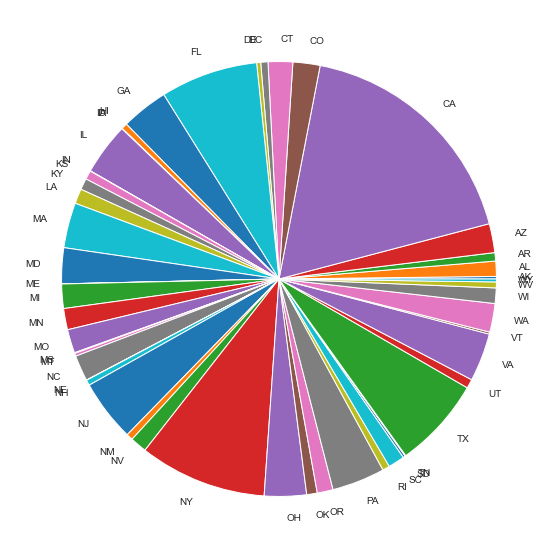

In [1109]:
df1_state = df1.groupby('addr_state')['addr_state'].count()
sns.set_style("whitegrid") # Set style for chart
plt.figure(figsize=(15,10)) # Set figure size
plt.pie(df1_state.values, labels = df1_state.index) # Create pie chart
plt.show() # Show chart

#INSIGHT: Most of the loans are issued to customers in California and NY.

### 11. Unordered categorical variable (verification_status)

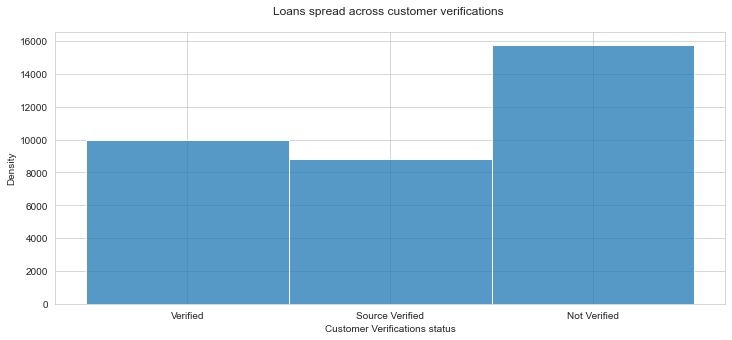

In [1094]:

sns.histplot( data = df1, x = df1.verification_status )
plt.title("Loans spread across customer verifications \n")
plt.xlabel("Customer Verifications status")
plt.ylabel("Density")
plt.show()

## INSIGHT: a lot more loans exist where customer information is not verified.

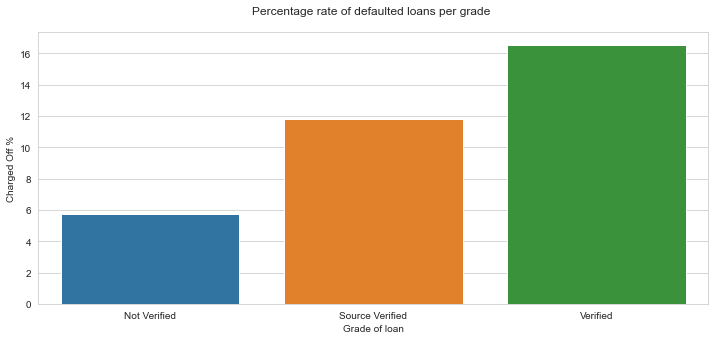

In [1095]:
# calculate % rate of default for all customer verification statuses
charged_off_verification = calculate_default_rate(df1, 'verification_status')
sns.barplot(data =charged_off_verification, x =charged_off_verification.verification_status, y = charged_off_loans_grade['Charged_Off_%'])
plt.title("Percentage rate of defaulted loans per grade \n")
plt.xlabel("Grade of loan")
plt.ylabel("Charged Off %")

plt.show()

#INSIGHT: ODD, more number of loans defaulted for customers who are verified. Should look at customer verification criteria. 

### 12 Interest rates across both segments

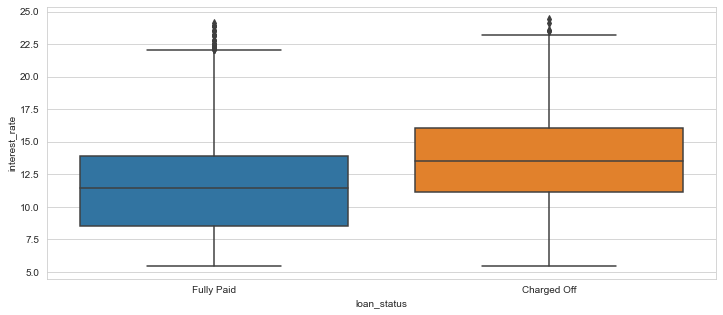

In [1108]:
sns.boxplot(data = df1, y = df1.interest_rate, x = df1.loan_status)
plt.title('Loan amount VS funded amount')
plt.xticks(rotation =90)
plt.ylabel("Loan amount issued")
plt.xlabel("Funded amount")
plt.show()
# INSIGHT: Interest rates are relatively higher for charged-off loans.
#For fully paid loans, there are significantly higher number of outliers as compared to Charged off loans

## Segmented bivariate Data Analysis

### 1. Mean Loan amount vs Issue Year

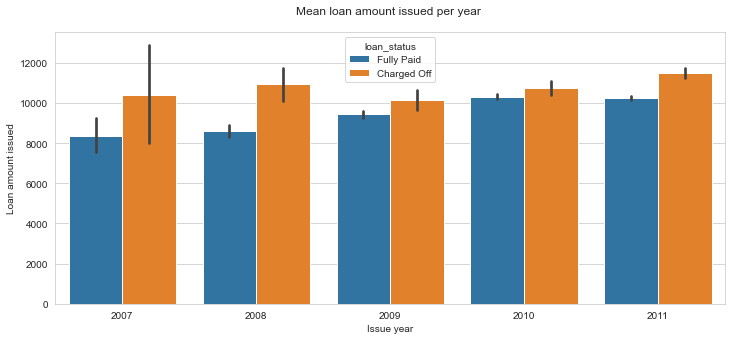

In [1123]:
sns.barplot(data = df1, x=df1.issue_year, y = df1.loan_amnt, hue = df1.loan_status )
plt.title("Mean loan amount issued per year \n")
plt.xlabel("Issue year")
plt.ylabel("Loan amount issued")

plt.show()

##Insight: Every year on an average more money issued to defaulting customers than what was isused to customers who fully paid.
##Clearly, not much of a profitable business. NO particular pattern for defaulted loans vs paid off loans

###  2. Loan term vs loan grade

In [1230]:
grade_term = df1.groupby(['grade','term', 'loan_status'])['grade'].count().unstack().unstack()
#print(grade_term.columns, grade_term.shape, grade_term.index)
#grade_term["Charged Off %"] = grade_term['Charged Off'] /(grade_term['Charged Off'] + grade_term['Fully Paid'] )*100
grade_term["%Charged_off_36"] = grade_term.iloc[:,0]/(grade_term.iloc[:,0] +grade_term.iloc[:,2])*100
grade_term["%Charged_off_60"] = grade_term.iloc[:,1]/(grade_term.iloc[:,1] +grade_term.iloc[:,3])*100
grade_term

loan_status Charged Off      Fully Paid       %Charged_off_36 %Charged_off_60
term                 36   60         36    60                                
grade                                                                        
A                   505   35       8289   337        5.742552        9.408602
B                   879  385       7636  1666       10.322959       18.771331
C                   765  441       4555  1366       14.379699       24.405091
D                   523  468       2400  1169       17.892576       28.588882
E                   143  427        604   984       19.143240       30.262225
F                    42  202        135   391       23.728814       34.064081
G                    18   58         30   114       37.500000       33.720930

<AxesSubplot:xlabel='grade'>

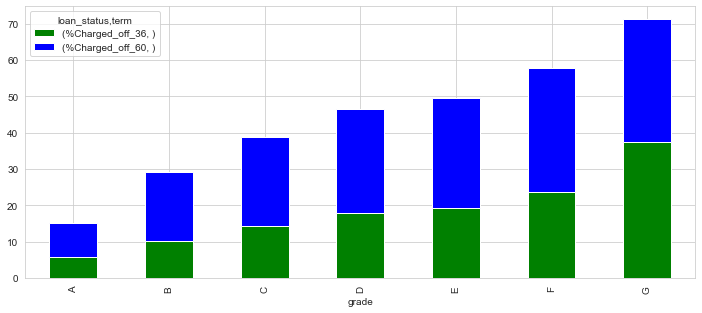

In [1229]:
grade_term[['%Charged_off_36','%Charged_off_60']].plot(kind='bar', stacked=True, color=['green', 'blue' ])
#INSIGHT:For each loan(Except for grade G) grade, charged off percentage of 60 months loans is higher than 36 months.  

### 3. Loan amount vs annual income

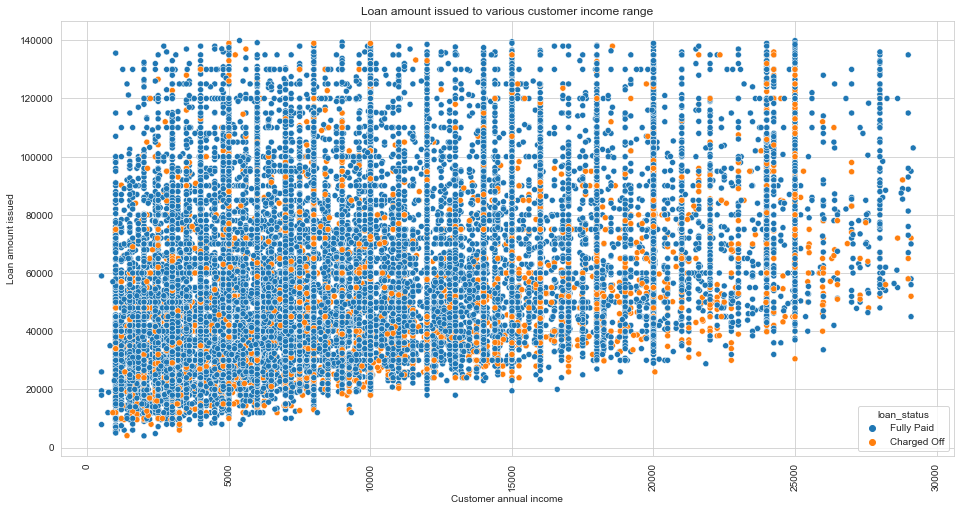

In [1112]:
plt.figure(figsize=(16,8)) # Set figure size
plt.title("Loan amount issued to various customer income range")

plt.xticks(rotation =90)
plt.ylabel("Loan amount issued")
plt.xlabel("Customer annual income")
sns.scatterplot(data = df1, x= df1.loan_amnt, y =df1.annual_inc, hue = 'loan_status')
plt.show()
# INSIGHT: all range of loan amounts are issued to customrs who have varied range annual incomes for both segments. 
#there is no relationship between the two variables

### 4. Loan amount vs funded amount

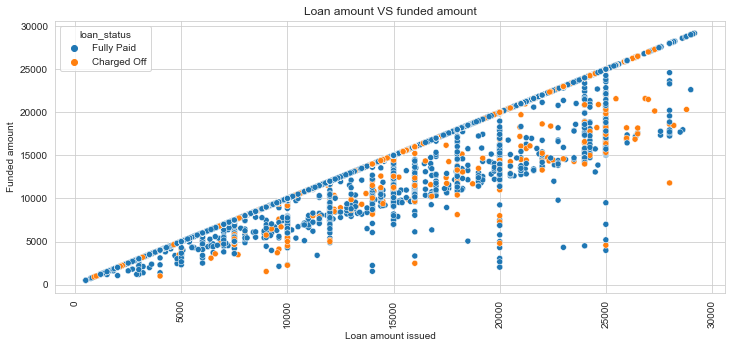

In [1113]:
sns.scatterplot(x= df1.loan_amnt, y =df1.funded_amnt, hue = df1.loan_status)
plt.title('Loan amount VS funded amount')
plt.xticks(rotation =90)
plt.ylabel("Funded amount")
plt.xlabel("Loan amount issued")
plt.show()

## INSIGHT: loan amount issued is directly proportional to funded amount and is always less than funded amount.

### 5. Loan amount vs interest rate


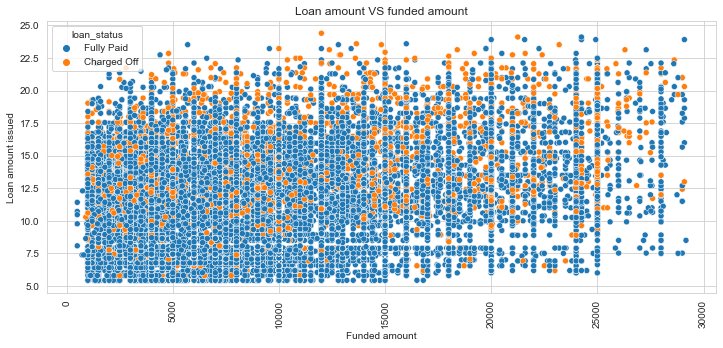

In [1115]:
sns.scatterplot(x= df1.loan_amnt, y =df1.interest_rate, hue = df1.loan_status)
plt.title('Loan amount VS funded amount')
plt.xticks(rotation =90)
plt.ylabel("Loan amount issued")
plt.xlabel("Funded amount")
plt.show()


#INISIGHT: Interest rate of the loan is not directly related to loan amount in both segments`

### 6. interest rate vs loan term

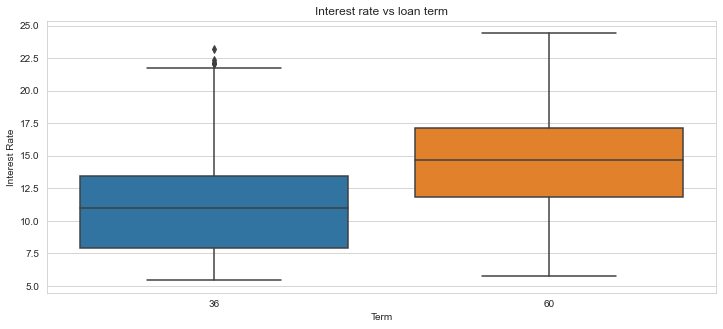

In [1121]:
sns.boxplot(x = 'term', y = 'interest_rate', data=df1)
plt.title('Interest rate vs loan term')
plt.ylabel("Interest Rate")
plt.xlabel("Term")
plt.show()

## INSIGHT: Rate of interest is higher for loans of longer duration

### 7. Correlation between various fields for charged off loans

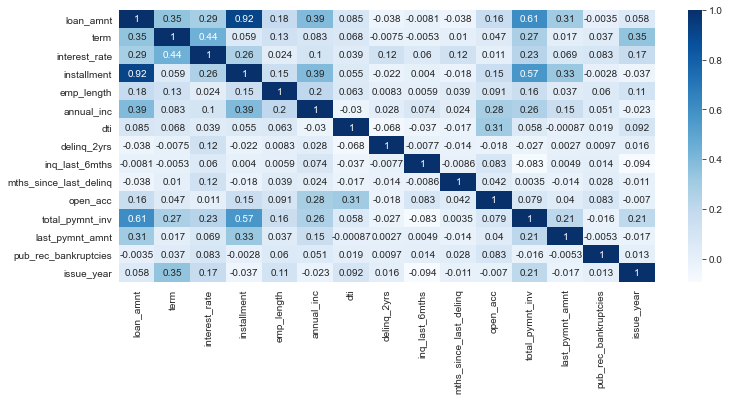

In [1114]:
charged_off_numerics_records = df1[df1['loan_status'] == 'Charged Off'][['loan_amnt','term','interest_rate','installment','emp_length','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc','total_pymnt_inv','last_pymnt_amnt','pub_rec_bankruptcies','issue_year']].corr()
#sns.set(font_scale=1.1, ize = (14,6))
sns.set_context(font_scale=1.5, rc={'figure.figsize':(18,8)})
sns.heatmap(charged_off_numerics_records, annot=True, cmap="Blues")
plt.show()


# INSIGHT: 
# 1.payment fields are realted to loan amount.
# 2. loan amount is negatively related to pub_rec_bankruptcy
# 3. dti is negatively related to annual income.  